# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Общие данные

***Цели***:   

***1.Изучить предоставленные данные.***   

***2. Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.***

***3. Добавить новые столбцы, которые понадобяться для дальнейшего анализа***

***4. Провести исследовательский анализ данных.***  
Изучите следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.  
    
Построить отдельные гистограммы для каждого из этих параметров. Описать все наблюдения.  
Изучить, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.  
Построить гистограмму. Посчитать среднее и медиану. Описать сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими? Какие факторы больше всего влияют на общую (полную) стоимость объекта.  
Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров.  
Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.  
Посчитать расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

***5. Написать общий вывод*** 

***Описание данных:***
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
- balcony — число балконов  
- ceiling_height — высота потолков (м)  
- cityCenters_nearest — расстояние до центра города (м)  
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
- first_day_exposition — дата публикации  
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Изучим общую информацию. 

#### Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')        

#### Выведим первые 10 строчек датафрейма data на экран.

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Выведим основную информацию о датафрейме с помощью метода info() и shape.

In [4]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

(23699, 22)

#### Построим общую гистограмму для всех столбцов*

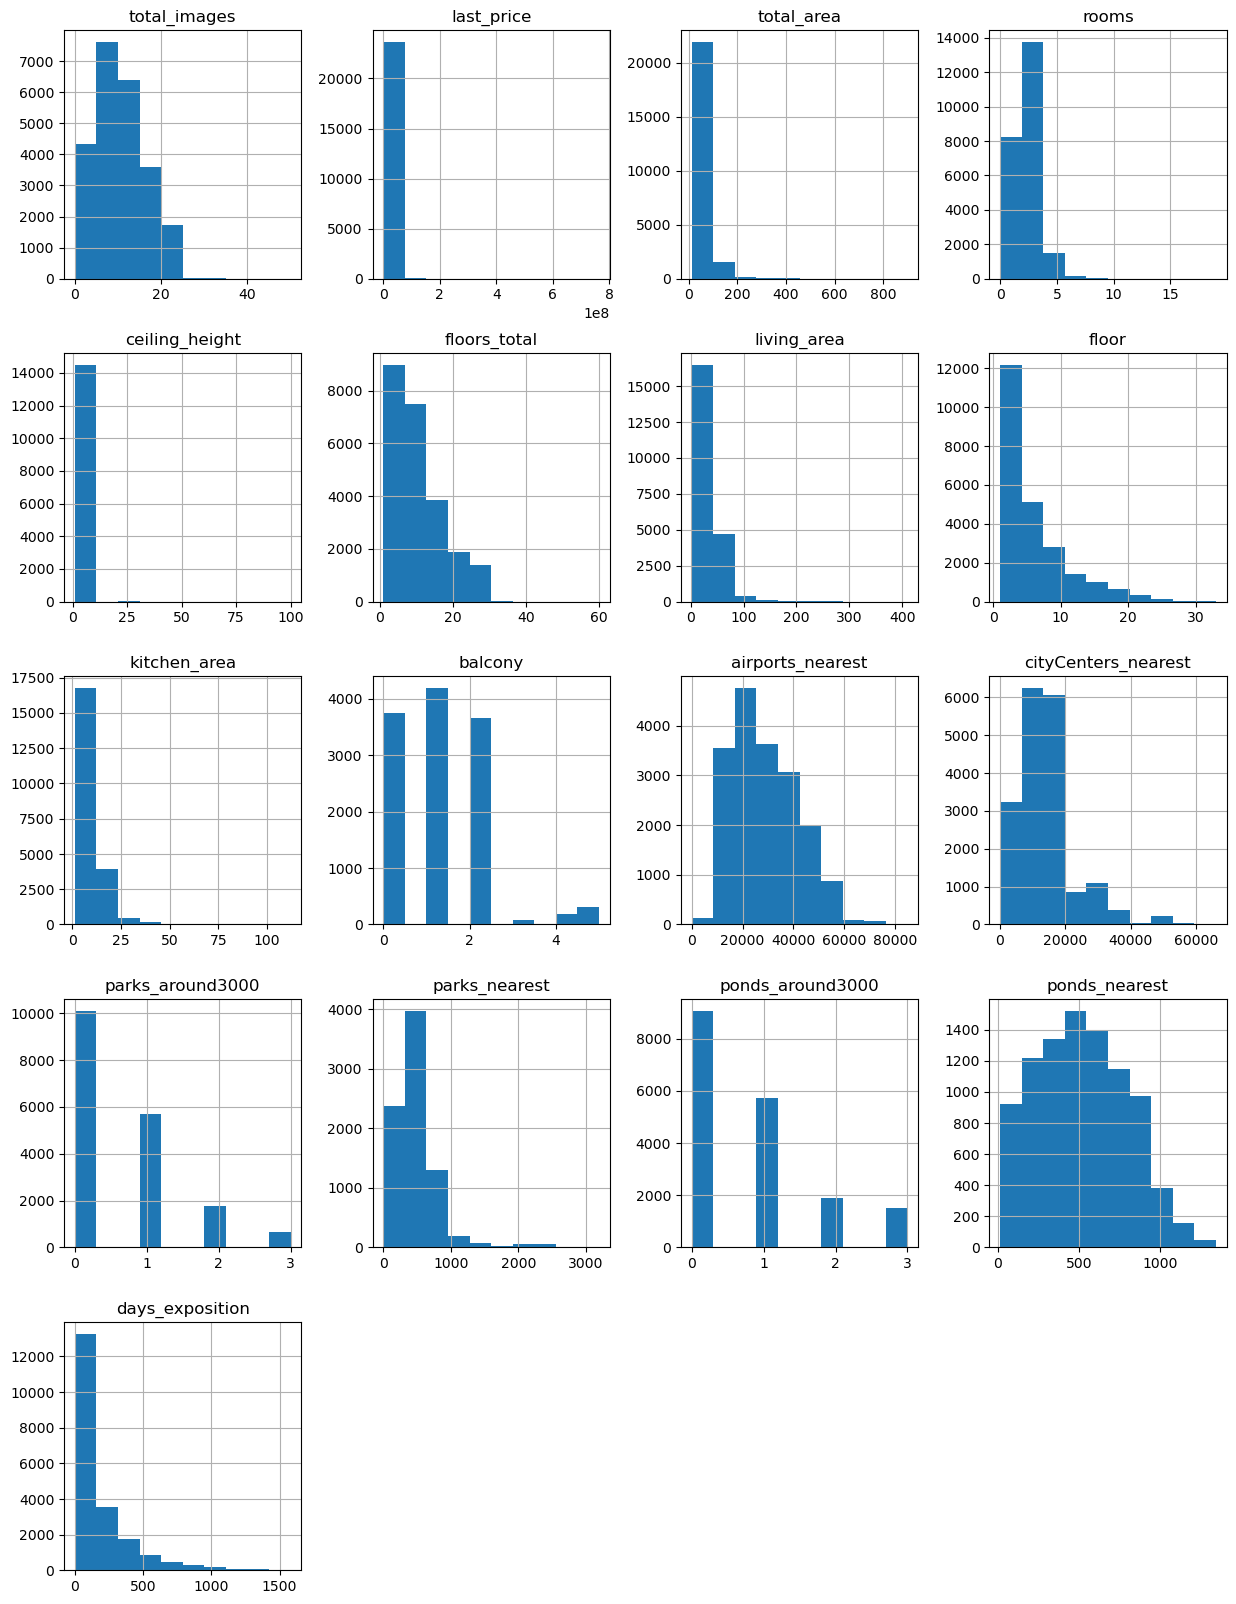

In [5]:
data.hist(figsize=(15,20))
plt.show()

***Краткий вывод:*** Вывели общую информацию. Датафрейм состоит из 23699 строк и 22. Более половины столбцов имеют пропуски. Для анализа необхjдимо их обработать. 

## Предобработка данных

### Переименуем столбец в соответствие с правилами.

In [6]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

### Выведим количество пропущенных значений для каждого столбца.

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Обработаем пропуски

**Высота потолков `['ceiling_height']` - все пропуски заменили на медианное значение.**

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].median())

**Наличие балконов `['balcony']` - в строках, где продавец не указал наличие балконов, можно предположить что их там нет, поэтому заполним пропуски 0.**

In [9]:
data['balcony'] = data['balcony'].fillna(0)


**Заполнять пропуски в столбце `['living_area']` средним или медианным значением будет не совсем корректно. Вычислим среднее значение коэффициента отношения общей площади к жилой. Для заполнения пропусков в столбце разделим общую площадь на полученный коэффициент.**

In [10]:
area_ratio = data['total_area'].mean()/data['living_area'].mean()
data['living_area'] = data['living_area'].fillna(value=data['total_area']/area_ratio).round()

**Аналогичным образом заполним пропуски в столбце `['kitchen_area']`.**

In [11]:
kitchen_ratio = data['total_area'].mean()/data['kitchen_area'].mean()
data['kitchen_area'] = data['kitchen_area'].fillna(value=data['total_area']/kitchen_ratio).round()

**Из данных таблицы можно заметить, что столбцы с чилсом парков\водоемов в радиусе 3 км. и и расстоянием до ближайшего объета взаимосвязаны. Поэтому можно заполнить часть пропусков в столбцах `ponds_nearest` и `parks_nearest` нулями, там где в столбцах `ponds_around3000`,`parks_around3000` стоит 0, т.к. если нет парков\водоемов в указанном радиусе, то и расстояние до него равно 0. Оставшиеся пропуски оставляем как есть.**

In [12]:
data.loc[(data['ponds_around3000'] == 0), 'ponds_nearest']=0
data.loc[(data['parks_around3000'] == 0), 'parks_nearest']=0

**Заполним пропуски в столбце `is_apartment` значением False, т.к. есть значения True. Можно предположить, что если значение не заполнено, то квартира не является аппартаментами.**

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False)

**Удалим пропуски в столбцах `floors_total` и `locality_name` т.к. процент их очень мал.(0.4% и 2% соответственно).**

In [14]:
data = data.dropna(subset = ['floors_total','locality_name']).reset_index(drop=True)

In [15]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5524
city_centers_nearest    5501
parks_around3000        5500
parks_nearest           5500
ponds_around3000        5500
ponds_nearest           5500
days_exposition         3171
dtype: int64

### Обрабатываем редкие и выбивающие значения.

**В столбце `ceiling_height` мы видим высоту потолков от 1м до 100м. Стандартная высота потолков по СанПин может варьироваться от 2.4м до 4м. Этот диапазон и возьмем за основу.Также обработаем редкие и выбивающиеся значения. Например, в столбце `ceiling_height` мы видим высоту потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Остальные значения заполним медианой**

In [16]:
print(sorted(data['ceiling_height'].unique()))

[1.0, 1.2, 1.75, 2.0, 2.2, 2.25, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 10.3, 

In [17]:
data.loc[(data['ceiling_height'] < 2.4) | (data['ceiling_height'] > 40),'ceiling_height'].count()

22

**Как мы видим аномальных значений всего 22, удалим их.**

In [18]:
data = data.query('ceiling_height <= 40')
data = data.query('ceiling_height >=2.4')

**Приведем в соответствие выбивающиеся значения, остальные заменим на медиану**

In [19]:
data.loc[(data['ceiling_height'] > 24) & (data['ceiling_height'] < 40), 'ceiling_height']/10
ceil_median = data['ceiling_height'].median()
data.loc[(data['ceiling_height'] > 4) | (data['ceiling_height'] < 2.4), 'ceiling_height'] = ceil_median
print(sorted(data['ceiling_height'].unique()))

[2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0]


### Изучим уникальные значения в стольбце и устараним неявные дубликаты

**Мы видим, что в наименование населенных пунктво встречается одинаковые названия, с различием в слово "поселок". Исправим это.**

In [20]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [21]:
len(data['locality_name'].unique())

364

In [22]:
data['locality_name'] = data['locality_name'].str.replace("посёлок", "поселок")

In [23]:
len(data['locality_name'].unique())

330

**Видим, что уникальных значений стало на 34 меньше.**

### Изменяем тип дынных в выбранных столбцах

**Изменим тип данных столбца `first_day_exposition` на 'datetime'**

In [24]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

**Изменим тип данных столбцов, там где можно использовать целые числа. Цена: в датафрейме указана целочисленным значением, без копеек. Этажи: могут быть только целочисленные, не может быть 2.5 этаж. Аналогично балконы.**


In [25]:
data[['last_price','floor','floors_total','balcony']] = \
data[['last_price','floor','floors_total','balcony']].astype('int64')

### Проверим наличие явных дубликатов

In [26]:
data.duplicated().sum()

0

**Явных дубликатов не обнаружено**

**Краткий вывод:** Обработали пропуски, где это было возможно. 
 - В столбце "ceiling_height" пропуски заменили на медианное значение. Обработали выбивающиеся значения.
 - Удалили пропуски в столбцах "floors_total" и "locality_name" т.к. процент их очень мал.(0.4% и 2% соответственно), а для заполнения нет данных.
 - Заполнили пропуски в столбце "balcony"
 - Рассчитали коэффициент общей площади к жилой\кухни и заполнили пропуски в столбцах, соответственно.
 - В столбцах "parks_nearest" и "ponds_nearest" заполнили пропуски по значениям столбцов "parks_around3000" и "ponds_around3000", там гже это было возможно.
 - В столбце "locality_name" выявили и устранили неявные дубликаты.
 - Поменяли тип данных в столбцах, где это было необходимо.
 - Произвели проверку на наличие явных дубликатов

## Посчитайте и добавьте в таблицу новые столбцы

In [27]:
data['square_price'] = data['last_price']/data['total_area'] #столбец со ценой за кв.м

In [28]:
data['week_exposition'] = data['first_day_exposition'].dt.weekday #дата размещения (день недели)
data['month_exposition'] = data['first_day_exposition'].dt.month #месяц
data['year_exposition'] = data['first_day_exposition'].dt.year  #год

**Напишем функцию для нового столбца `floor_type`, она разделит на категории типы этажей.**

In [29]:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor < 2:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

In [30]:
data['center_distance'] = (data['city_centers_nearest']/1000).round() #столбец с расстоянием до центра в км.

In [31]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,week_exposition,month_exposition,year_exposition,floor_type,center_distance
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,19.0,1,False,...,0.0,0.0,0.0,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.0,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,91.0,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


**Карткий вывод:** Добавили новые столбцы. Они пригодяться нам для дальнейшего анализа.

## Проведите исследовательский анализ данных

**Вызовем метод describe() и изучиим статистический данные**

In [32]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,week_exposition,month_exposition,year_exposition,center_distance
count,23543.000000,2.354300e+04,23543.000000,23543.000000,23543.000000,23543.000000,23543.000000,23543.000000,23543.000000,23543.000000,...,18058.000000,18058.000000,18058.000000,18058.000000,20375.000000,2.354300e+04,23543.000000,23543.000000,23543.000000,18057.000000
mean,9.880729,6.542803e+06,60.336203,2.070849,2.693667,10.677951,34.598225,5.879455,10.489105,0.593552,...,0.611474,217.344723,0.769188,259.233415,180.802258,9.941652e+04,2.567472,6.401181,2017.370896,14.186244
std,5.680537,1.091517e+07,35.668371,1.078789,0.203985,6.593215,22.380008,4.872584,6.049933,0.960429,...,0.802130,330.846667,0.938491,325.298159,219.801812,5.028802e+04,1.788239,3.492956,1.037594,8.621903
min,0.000000,1.219000e+04,12.000000,0.000000,2.400000,1.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.410500e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,45.000000,7.664559e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,0.000000,1.000000,13.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.799000e+06,69.705000,3.000000,2.700000,16.000000,42.000000,8.000000,12.000000,1.000000,...,1.000000,417.000000,1.000000,503.000000,231.000000,1.142439e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,4.000000,60.000000,410.000000,33.000000,112.000000,5.000000,...,3.000000,2984.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


### Изучим параметры объектов и опишем наблюдения

**Общая площадь**

In [33]:
print(len(data.query('total_area <50')))
print(len(data.query('total_area <75')))
print(len(data.query('total_area <100')))
print(len(data.query('total_area >200')))


10873
18842
21652
226


<AxesSubplot: >

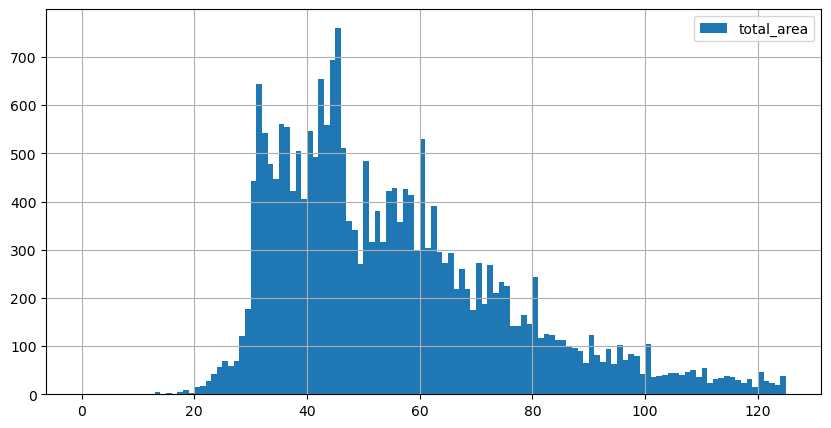

In [34]:
data['total_area'].hist(legend = 'total_area', bins = 125, range = (0, 125), figsize = (10,5))

**Ограничим диапзон в 125 кв.м, т.к. значения выше практически не влияют на общую картину. По графику можно сказать, что больше всего объявления с квартирами площадью 45-46кв.м. Почти 40% всех объявлений это квартиры до 50кв.м., что и логично однокомнатные квартиры самые востребованные.**

**Жилая площадь и площадь кухни**

<AxesSubplot: >

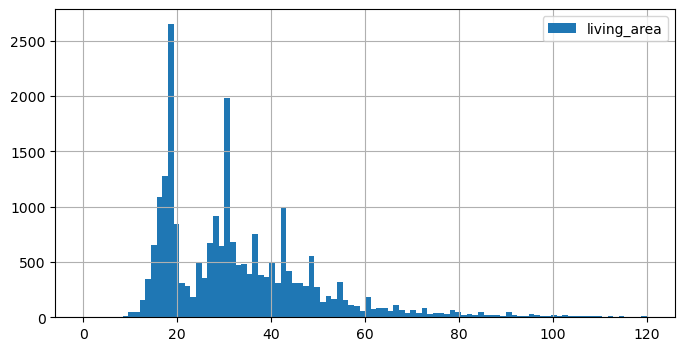

In [35]:
data['living_area'].hist(legend = 'living_area', bins = 100, range = (0, 120),figsize = (8,4))

<AxesSubplot: >

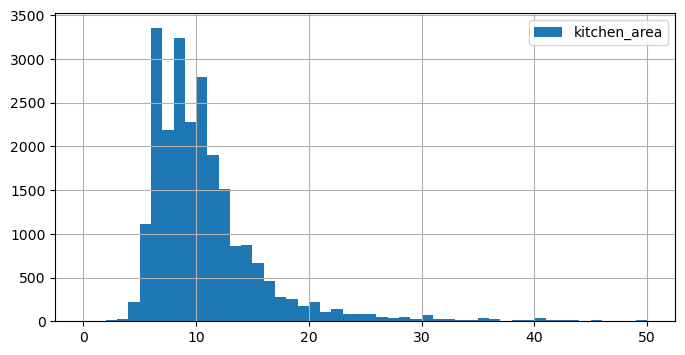

In [36]:
data['kitchen_area'].hist(legend = 'kitchen_area', bins = 50, range = (0, 50), figsize = (8,4))

**Жилая площадь и площадь кухни взаимосвязаны с общей площадью, поэтому сопоставимы. В графике с жилой площадью можно отметить, что квартир , в которых жилая площадь в диапазоне 24-28кв.м. очень мало. Возможно это свзяно с планировкой квартир строителями, и практически отсутствием таковых.**

**Цена**

<AxesSubplot: >

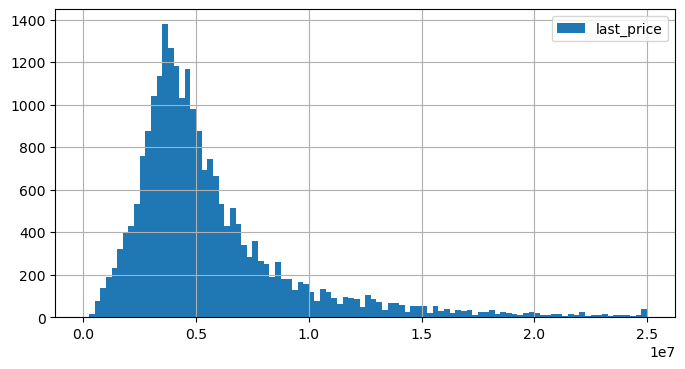

In [37]:
data['last_price'].hist(legend = 'last_price', bins = 100, range = (0, 25000000), figsize = (8,4))

**Из графика можно сделать вывод, что больше всего квартир продаются по цене в диапазоне от 2.5 до 7.5 млн.руб. Самые востребованные квартиры идут по цене около 3.6-3.8 млн. В остальных случаях, чем ниже\выше цена интерес пропорционально падает.**

**Количество команат**

<AxesSubplot: >

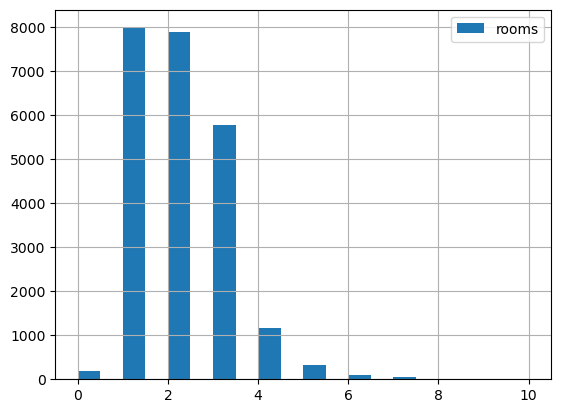

In [38]:
data['rooms'].hist(legend = 'rooms', bins = 20, range = (0, 10))

**Самые востребованные 1-2х комантаные квартиры, они занимают почти 2/3 всех объявлений. 3х комнатных тоже достаточно много. Квартиры с 5+ комнатами редкость.**

**Высота потолков**

<AxesSubplot: >

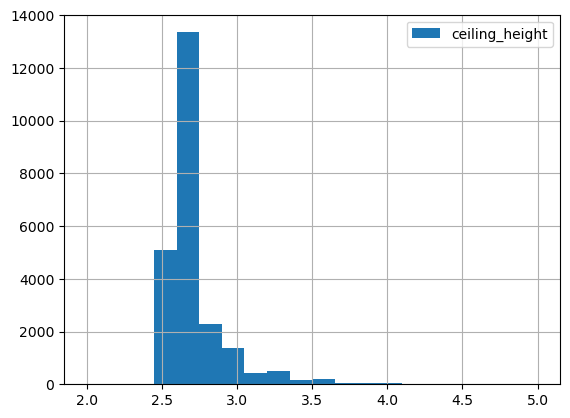

In [39]:
data['ceiling_height'].hist(legend = 'ceiling_height', bins = 20, range = (2,5))

**Больше всего объявлений с квартирами в котороых высота потолков ~2.8м.**

**Этажность**

<AxesSubplot: >

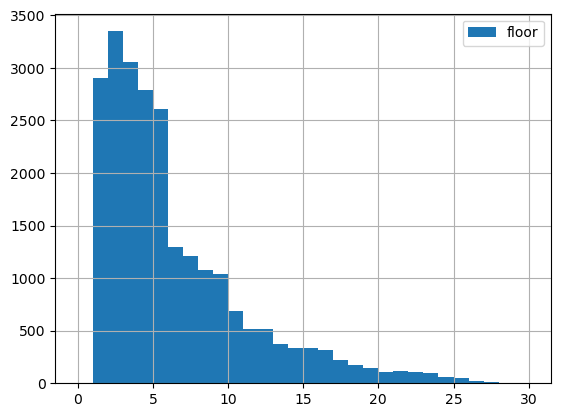

In [40]:
data['floor'].hist(legend = 'floor', bins = 30, range = (0, 30))

<AxesSubplot: >

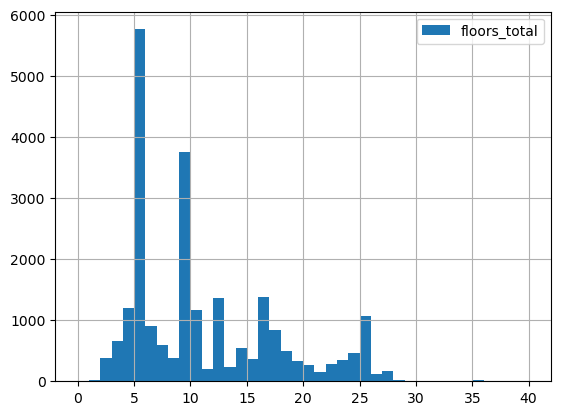

In [41]:
data['floors_total'].hist(legend = 'floors_total', bins = 40, range = (0, 40))

**Больше всего объявлений о продаже квартир в этажах 1-5. Можно предположить, что 5-ти и 9 этажные домов советской постройки, они самые распространенные(график 2). Так же достаточное количество квартир с этажам до 9. Далее чем больше этаж, тем меньшt объявлений.**

**Тип Этажа**

<AxesSubplot: >

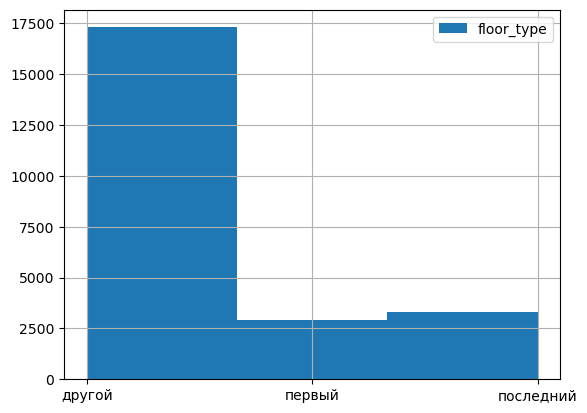

In [42]:
data['floor_type'].hist(legend = 'floor_type', bins = 3)

**Объявлений с продажей квартир, на первых и последних этажах, не так много, как других. На мой взгляд не очень информативная выборка.**

**Расстояние до центра города**

<AxesSubplot: >

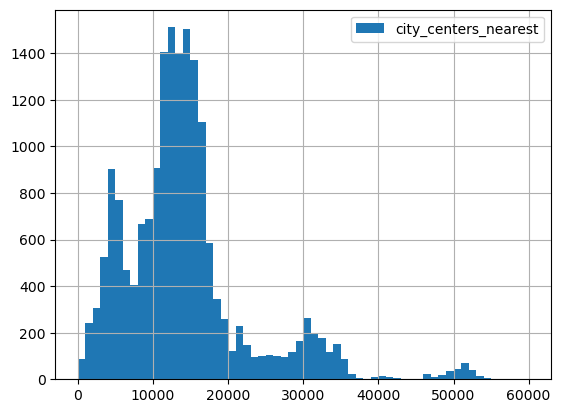

In [43]:
data['city_centers_nearest'].hist(legend = 'city_centers_nearest', bins = 60, range = (0, 60000))

**Основной пул объявлений это квартиры с расстояние до центра города 12-18км. Так же есть небольшой всплеск в районе 5км. Больше 18км. объявлений очень мало.**

**Расстояние до ближайшего парка**

<AxesSubplot: >

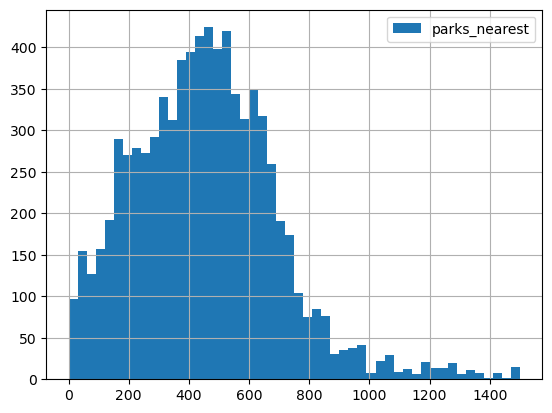

In [44]:
data['parks_nearest'].hist(legend = 'parks_nearest', bins = 50, range = (1, 1500))

In [45]:
len(data.query('parks_nearest == 0'))

10037

**Важно не забывать, что там где нет парков, в значение расстояния мы заполнили 0. Т.е. у 10037 обявлений в районе 3 км. нет парков, так же нет информации в 5500 объявлениях. Получается лишь примерно у 1/3 объявлений на расстояние в 3 км есть парки. Пик объявлений с раастоянием 500м, и пропорцианально растет или падает в зависимости от расстояния.**

**Расстояние до ближайшего аэропорта**

<AxesSubplot: >

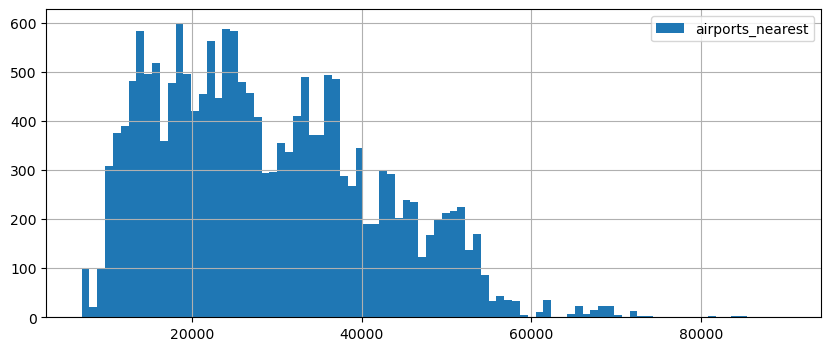

In [46]:
data['airports_nearest'].hist(legend = 'airports_nearest', bins = 90, range = (7000, 90000), figsize = (10,4))

**На графике видим, что ближайшие квртиры к аэропорту начинаются от 7км. Количество объявлений растет до расстония 19км., и затем начинает уменьшаться. Больше всего объявлений в дипазоне от 20 до 40 км.**

**День и месяц публикации объявления**

<AxesSubplot: >

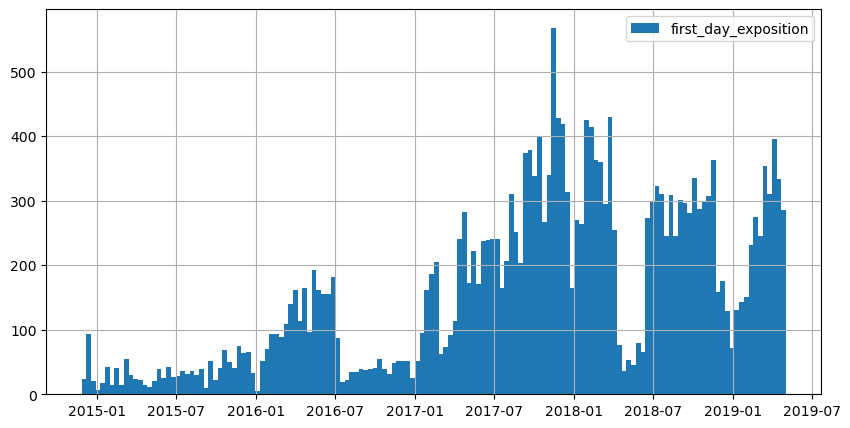

In [47]:
data['first_day_exposition'].hist(legend = 'first_day_exposition', bins = 150, figsize = (10,5))

**Из графика видим, что с 2015 года наблюдается рост количества объявлений. Пик приходится на конец 2017. Но так же имеются резкие падения: вторая половина 2016, 2018 и начало 2019г. Возможно это связано с какими то внешними, экономическими или политическими факторами.**

<AxesSubplot: >

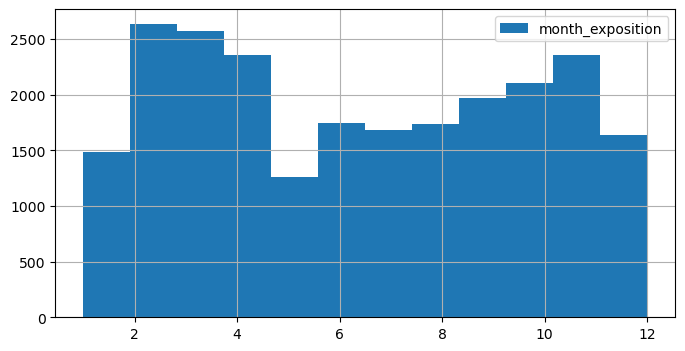

In [48]:
data['month_exposition'].hist(legend = 'month_exposition', bins = 12, figsize = (8,4))

**Мы видим, что в первый и последний месяцы года активность подачи объявлений достаточно низкая. Вероятно это связано с новогодними празниками. Зато с февраля активность резко возрастает и начинает постепенно уменьшатся к маю. Месяц с самым маленьким количеством объявлений это май.Возможная причина майский праздники, дачный сезон. Летом так же активность меньше, но начинает расти к осени.**

### Изучим как быстро продавались квартиры

In [49]:
data['days_exposition'].describe()

count    20375.000000
mean       180.802258
std        219.801812
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot: >

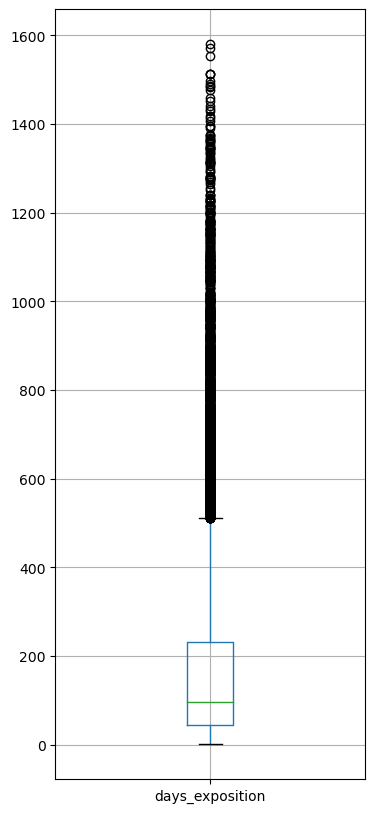

In [50]:
data.boxplot(column='days_exposition', figsize=(4,10))

<AxesSubplot: >

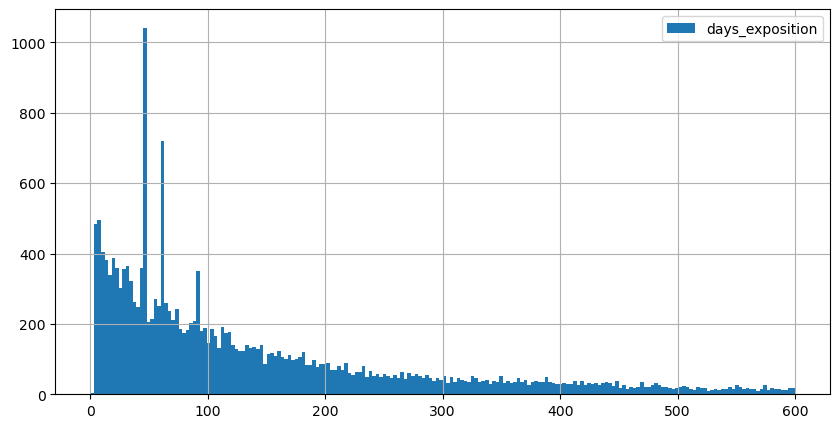

In [51]:
data['days_exposition'].hist(legend = 'days_exposition', bins = 200, range = (0, 600), figsize = (10,5))

In [52]:
data['days_exposition'].agg(['median', 'mean'])

median     95.000000
mean      180.802258
Name: days_exposition, dtype: float64

**Вывели среднее и медиану, по графику можно судить, что это распределение Пуассона, но видны резкие всплески изучим их поподробнее.**

<AxesSubplot: >

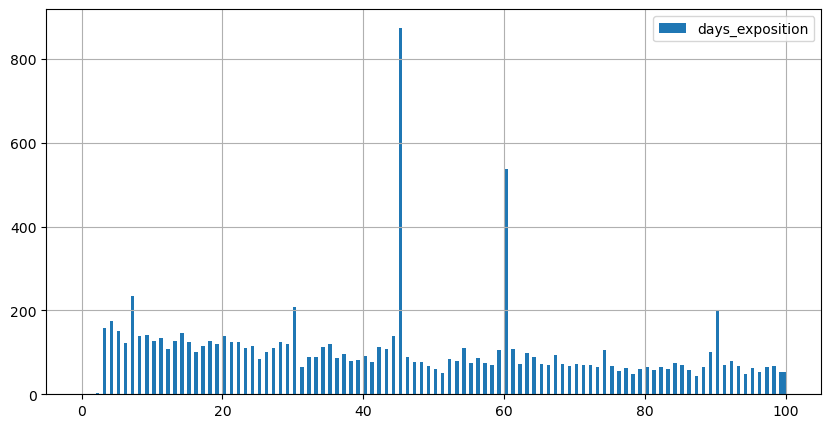

In [53]:
data['days_exposition'].hist(legend = 'days_exposition', bins = 200, range = (0, 100), figsize = (10,5))

In [54]:
data.query('days_exposition < 100')['days_exposition'].value_counts()

45.0    875
60.0    538
7.0     234
30.0    208
90.0    200
       ... 
94.0     49
78.0     49
87.0     43
2.0       3
1.0       1
Name: days_exposition, Length: 99, dtype: int64

**Явно видно, что значения 45, 60, 7, 30, 90 сильно выбиваются, возможно это связано с временем нахождения объявления на портале и его пролонгацией. Это может быть как технический фактор(н-р объявления автоматически закрываются после указанного срока, даже если квартира не продалась) или человеческий (просто забыли закрыть после продажи и оно автоматом закролось без пролонгации, или не поставили галочку автопродления). Так или иначе эти всплески в определенной степени меняют картину. Попробуем это исправить.**

In [56]:
filtred_de = data.query('days_exposition != 7 and days_exposition != 30 and days_exposition != 60')
filtred_de = filtred_de.query('days_exposition < 45 or days_exposition >= 46')
filtred_de = filtred_de.query('days_exposition < 90 or days_exposition >= 91')

In [57]:
filtred_de.query('days_exposition < 100')['days_exposition'].value_counts()

4.0     174
3.0     157
5.0     152
14.0    147
9.0     142
       ... 
94.0     49
78.0     49
87.0     43
2.0       3
1.0       1
Name: days_exposition, Length: 94, dtype: int64

In [58]:
filtred_de['days_exposition'].describe()

count    18320.000000
mean       195.759443
std        226.859480
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot: >

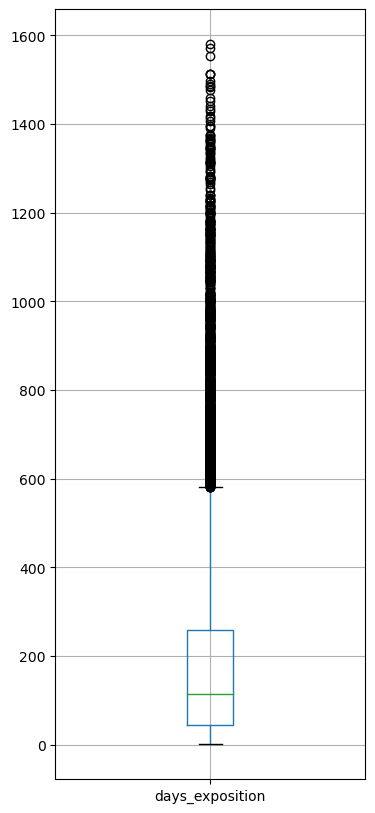

In [59]:
filtred_de.boxplot(column='days_exposition', figsize=(4,10))

<AxesSubplot: >

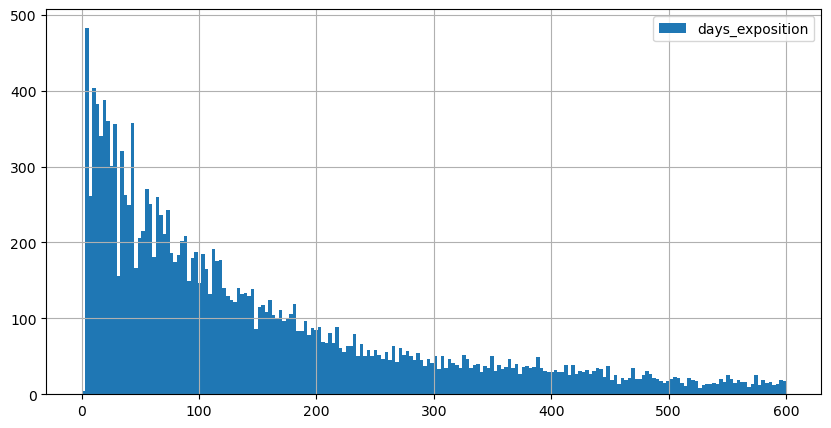

In [60]:
filtred_de['days_exposition'].hist(legend = 'days_exposition', bins = 200, range = (0, 600), figsize = (10,5))

**Мы видим как изменились данные после очистки. Медиана и среднее значение с 95 и 180, стали 114 и 195. Так же видим изменение нормальных значений с 500 до 600.**

**Краткий вывод: Итого, продажа квартиры занимает от 3 до 6 месяцев, все что продается раньше 40 дней можно назвать быстрой продажей, соответственно больше 600 уже необыно долгая.**

### Факторы, которые влияют на общую стоимость объекта

**Общая площадь**

In [61]:
data['last_price'].corr(data['total_area'])

0.6536485092128064

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='last_price', ylabel='total_area'>

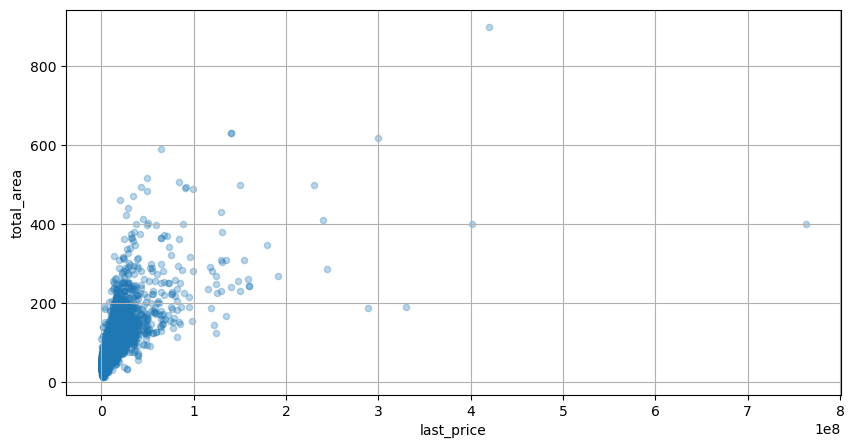

In [62]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3, figsize= (10,5), grid=True)

**Кореляция 0.65. Из графика видно, что завсимость есть, но она более явно выражена в диапазоне цены от 0-5млн.**

**Жилая площадь и площадь кухни**

In [63]:
data['last_price'].corr(data['living_area'])

0.5856792745872247

<AxesSubplot: xlabel='last_price', ylabel='living_area'>

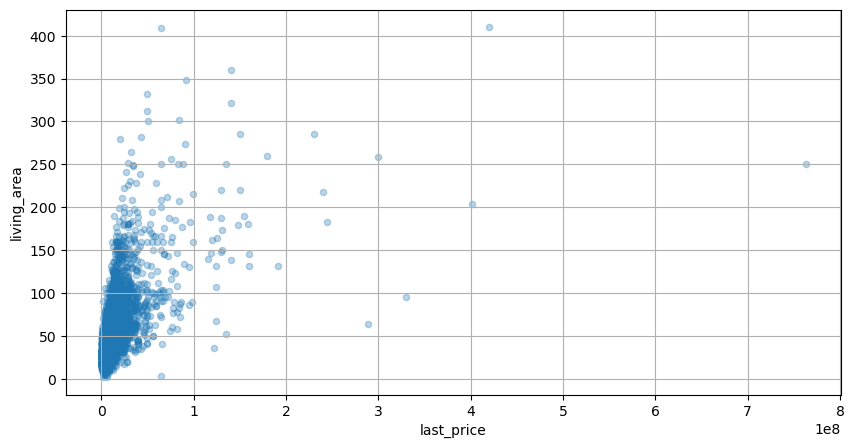

In [64]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3, figsize= (10,5), grid=True)

In [65]:
data['last_price'].corr(data['kitchen_area'])

0.5141584232953424

<AxesSubplot: xlabel='last_price', ylabel='kitchen_area'>

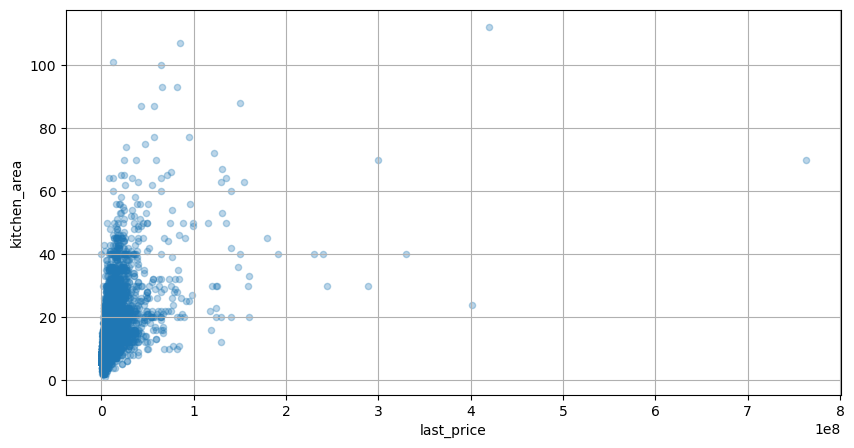

In [66]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3, figsize= (10,5), grid=True)

**Тут тоже есть зависимость, но она выражана еще более слабо, по сравнению с жилой площадью.**

**Количество комнат**

In [67]:
ddd = data.query('last_price<60000000')
ddd['last_price'].corr(ddd['rooms'])

0.5034720490217025

In [68]:
data['last_price'].corr(data['rooms'])

0.3632761275288639

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='rooms', ylabel='last_price'>

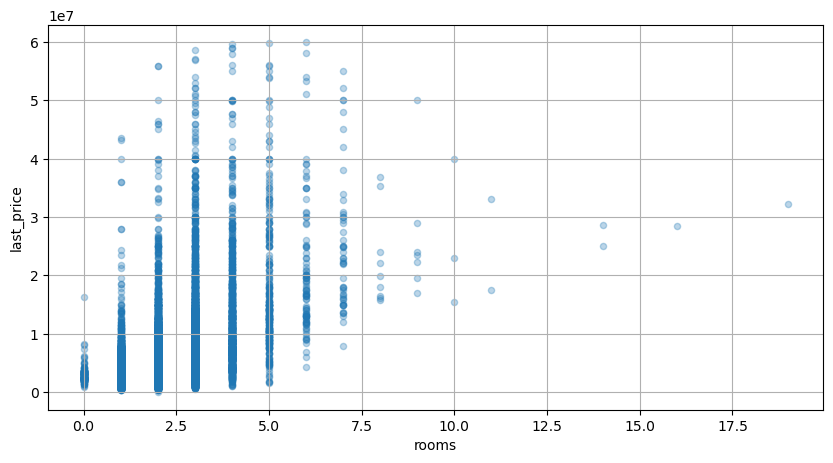

In [69]:
data.query('last_price<60000000').plot(y='last_price', x='rooms', kind='scatter', alpha=0.3, figsize= (10,5), grid=True,)

**Из графика можно сделать вывод, что зависимотсь очень слабая, в большей степени выражена в ценовом диапазоне до 3 млн. и количеством комнат до 3.**

**Тип этажа**

<AxesSubplot: xlabel='floor_type'>

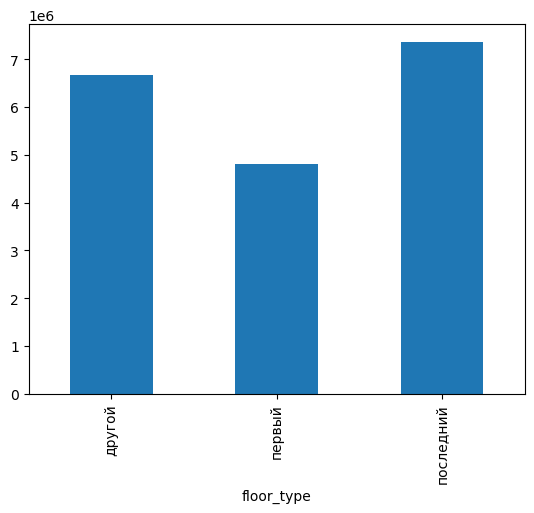

In [70]:
data.groupby('floor_type')['last_price'].mean().plot(kind='bar')

**Мы видим, что первый этаж пользуется наименьшим спросом, если говорить в общем, с увеличением этажа растет и цена.**

**Дата размещения(день недели, месяц, год)**

In [71]:
data['last_price'].corr(data['week_exposition'])

0.0013775520018165716

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='week_exposition', ylabel='last_price'>

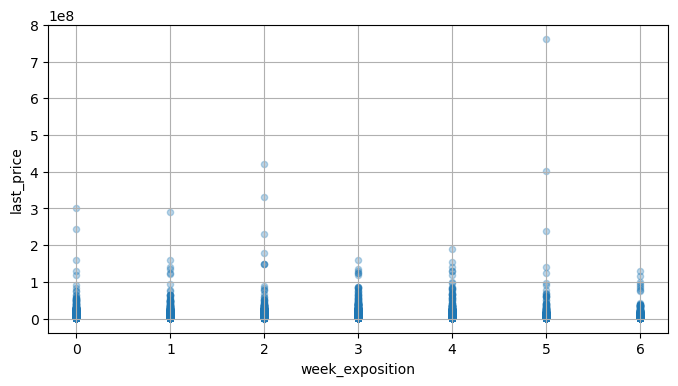

In [72]:
data.plot(y='last_price', x='week_exposition', kind='scatter', alpha=0.3, figsize= (8,4), grid=True)

In [73]:
data['last_price'].corr(data['month_exposition'])

0.002803785880960901

<AxesSubplot: xlabel='month_exposition', ylabel='last_price'>

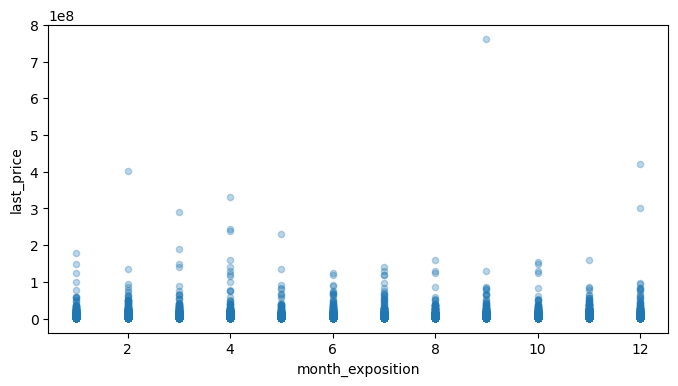

In [74]:
data.plot(y='last_price', x='month_exposition', kind='scatter', alpha=0.3, figsize= (8,4))

In [75]:
data['last_price'].corr(data['year_exposition'])

-0.04292490433049537

<AxesSubplot: xlabel='year_exposition', ylabel='last_price'>

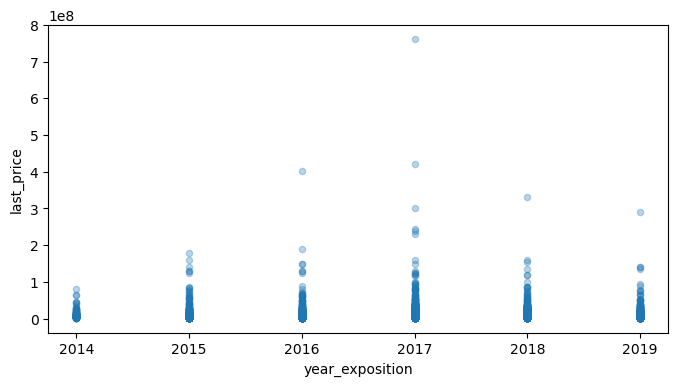

In [76]:
data.plot(y='last_price', x='year_exposition', kind='scatter', alpha=0.3, figsize= (8,4))

**Из графиков може сделать вывод, что цена не зависит от даты размещения объявления**

### Ресчет средней стоимости одного кв.м. в топ 10 населенных пунктов.

In [77]:
data.pivot_table(index = 'locality_name', values= 'square_price', aggfunc=['median','count'])\
.sort_values(by = ('count','square_price'), ascending=False).head(10)\
.style.background_gradient(subset = 'median', vmin=55000, vmax=120000)

,median,count
,square_price,square_price
locality_name,,
Санкт-Петербург,104774.535809,15645
поселок Мурино,86059.293995,552
поселок Шушары,76829.268293,439
Всеволожск,65789.473684,397
Пушкин,100000.000000,369
Колпино,74723.748474,338
поселок Парголово,91642.857143,327
Гатчина,67796.610169,307


**Краткий вывод: Самые дорогие квартиры в Санкт-Петербурге, самые дешевые в Выборге.**

### Расчет стоимости каждого км. до центра

In [78]:
data.query('locality_name == "Санкт-Петербург"').groupby('center_distance')['square_price'].mean()

center_distance
0.0     245833.530289
1.0     177005.407676
2.0     157849.007329
3.0     121507.831586
4.0     133282.874761
5.0     140453.957043
6.0     151012.193621
7.0     156176.879664
8.0     124825.411428
9.0     113159.373316
10.0    112607.481372
11.0    108381.748315
12.0    107487.510816
13.0    108099.097997
14.0    104197.381465
15.0    104239.720058
16.0    100542.613949
17.0     96970.231064
18.0     96362.263941
19.0     98658.388032
20.0    103056.539879
21.0     94469.584582
22.0     91330.425050
23.0     91828.517765
24.0     85736.904595
25.0     91531.371618
26.0     87798.872892
27.0    132115.709459
28.0     81161.915320
29.0     72953.365445
Name: square_price, dtype: float64

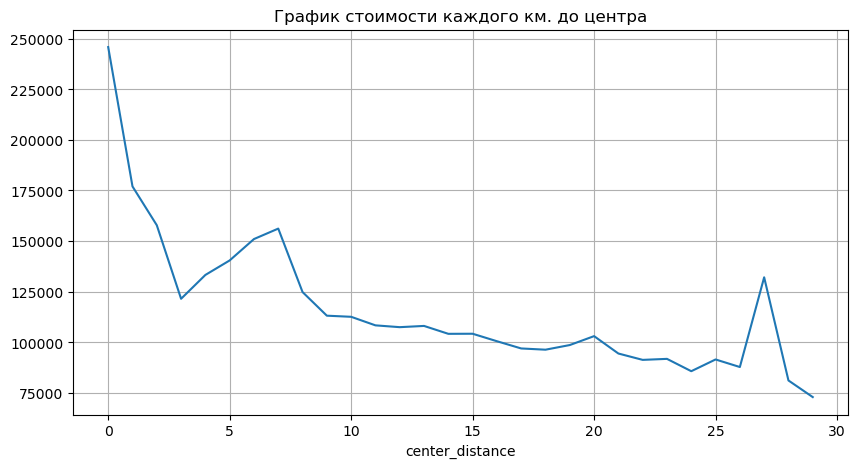

In [79]:
data.query('locality_name == "Санкт-Петербург"').groupby('center_distance')['square_price'].mean()\
.plot(grid=True, figsize= (10,5), title = 'График стоимости каждого км. до центра')
plt.show()

**Краткий вывод: Из вычислений можем сделать вывод, что чем ближе к центру, тем дороже квартиры. Так же мы видим спад цены на 3-4км, с дальнейшим ростом на 6-7км, присутствует скачок на 27км. Без изучения специфики рынка Санкт-Петербурга делать вывод сложно. Можно предположить, что спад на 3км обусловлен тем, что это вблизи исторического центра города, со старыми домами, шумом и наличием туристов, и люди в меньшей степени заинтересованы в покупке там квартиры. Про резкий рост на 27км, можно предположить, что это какой-то новый микрорайон, со всеми удобставми, инфраструктурой и метро, поэтому есть спрос.**

## Общий вывод

Для изучения нам был представлен датасет Яндекс Недвижимости.  
 - В ходе проделанной работы мы изучили общую информацию, произвели предобработку данных. Обработали пропущенные значения там, где это было необходимо, заменили типы данных. Выявили и устранили неявыне дубликаты и редкие и выбивающиеся значения.
 - Добавли в таблицу новые столбцы, с дополнительными параметрами для далнейших исследований.
 - Провели исследовательский анализ.
     - Больше всего объявления с квартирами площадью 42-44кв.м. Почти 40% всех объявлений это квартиры до 50кв.м., так же большой популярность пользуются квартиры с площадью от 50 70 кв.м. - почти терть всех объявлений.
     - Больше всего объявлений в домах с 5-ю и 9-ю этажами.
     - Больше всего квартир продаются по цене в диапазоне от 2.5 до 7.5 млн.руб. Самые востребованные квартиры идут по цене около 3.6-3.8 млн. В остальных случаях, чем ниже\выше цена интерес пропорционально падает.
 - Продажа квартиры занимает от 3 до 6 месяцев, все что продается раньше 40 дней можно назвать быстрой продажей, соответственно больше 600 уже необыно долгая.
 - Из изученных факторов, больше всего на стоимость кавртиры влияет общая площадь.
 - Из выборки по количеству объявлений, в топ 10, самые дорогие квартиры в Санкт-Петербурге, самые дешевые в Выборге.
 